# TT Field

**-Reference:** [Tinyakov and Tkachev (2001)](https://arxiv.org/abs/astro-ph/0111305)

**-Original Implementation:** Hammurabi (old) [(code](https://sourceforge.net/projects/hammurabicode/), [paper)](https://arxiv.org/abs/0807.2262)

**-Default parameters constrained using (see reference publication):**  phenomenological arguments, model used to study clustering of ultra-high energy cosmic rays (UHECR) observed by AGASA and Yakutsk experiment

In [1]:
import ImagineModels as img
import numpy as np
from plotting_helpers import plot_slice

#### 1. Visualizing the model

In [2]:
model = img.TTMagneticField()
shape = [200, 200, 40] # necessarily a list of 3 ints! 
increment = [.20, .20, .20]  
refpoint = [-20., -20., -4.]
vmin = -6
vmax = 6


552786880


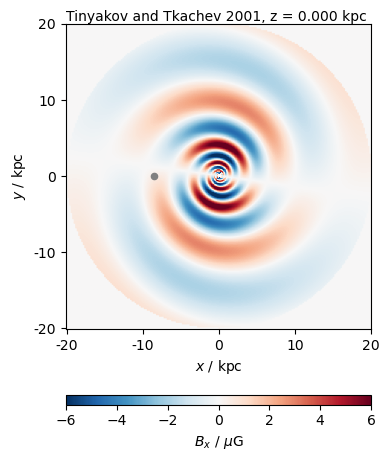

In [3]:
model_on_grid = model.on_grid(shape=shape, reference_point=refpoint, increment=increment)
print(np.sum(np.nonzero(model_on_grid)))
plot_slice(model_on_grid, 0, 2, shape, refpoint, increment, vmin, vmax, field_name='Tinyakov and Tkachev 2001')

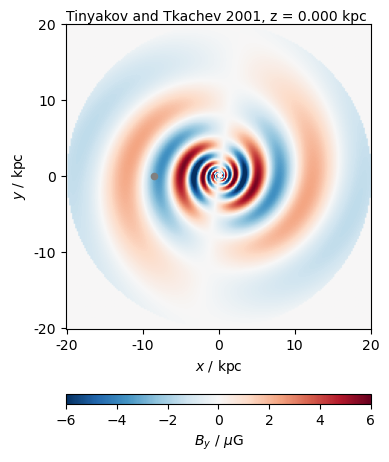

In [4]:
plot_slice(model_on_grid, 1, 2, shape, refpoint, increment, vmin, vmax, field_name='Tinyakov and Tkachev 2001')

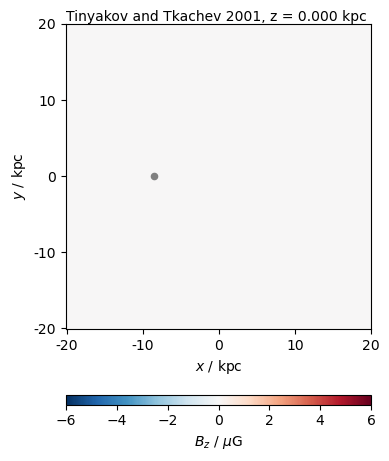

In [5]:
plot_slice(model_on_grid, 2, 2, shape, refpoint, increment, vmin, vmax, field_name='Tinyakov and Tkachev 2001')

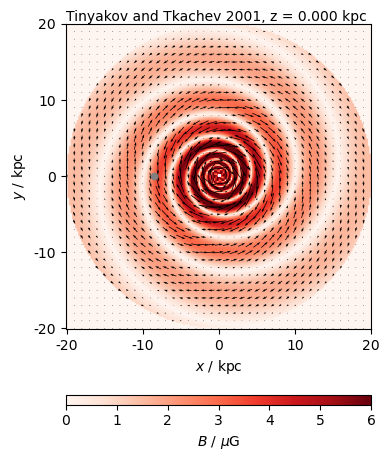

In [6]:
plot_slice(model_on_grid, 3, 2, shape, refpoint, increment, vmin, vmax, field_name='Tinyakov and Tkachev 2001', quiver=True)

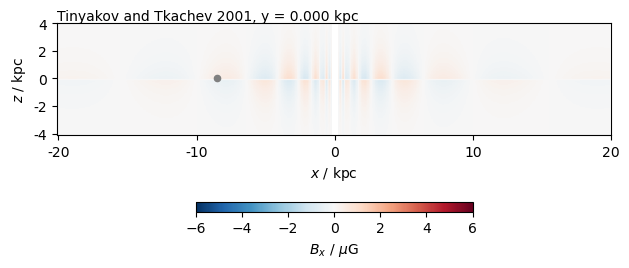

In [7]:
plot_slice(model_on_grid, 0, 1, shape, refpoint, increment, vmin, vmax, field_name='Tinyakov and Tkachev 2001')

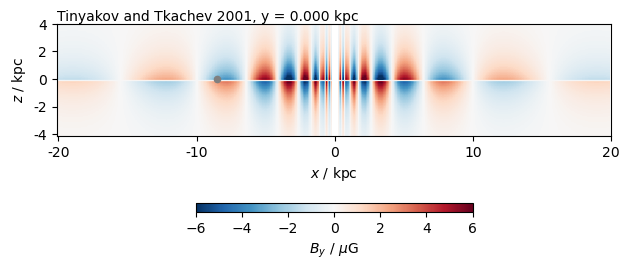

In [8]:
plot_slice(model_on_grid, 1, 1, shape, refpoint, increment, vmin, vmax, field_name='Tinyakov and Tkachev 2001')

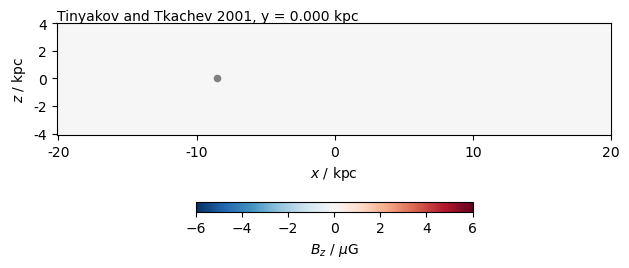

In [9]:
plot_slice(model_on_grid, 2, 1, shape, refpoint, increment, vmin, vmax, field_name='Tinyakov and Tkachev 2001')

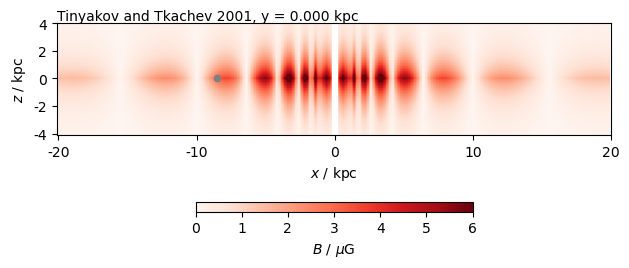

In [10]:
plot_slice(model_on_grid, 3, 1, shape, refpoint, increment, vmin, vmax, field_name='Tinyakov and Tkachev 2001')

### 2. The parameters

**TBD**